In [2]:
from tensorflow.python.keras.utils import np_utils 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

- np_utils 임포트할 때, tensorflow.keras로는 안됬는데 tensorflow.python.keras로는 됬음. 왜인진 모르겠다

In [3]:
np.random.seed(3)

### 데이터셋 생성하기

In [4]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
# 데이터 전처리

x_train = x_train.reshape(50000,784).astype('float32')/255
x_val = x_val.reshape(10000,784).astype('float32')/255
x_test = x_test.reshape(10000,784).astype('float32')/255

- 왜 255로 나눈지는 모르겠다

In [13]:
# 훈련셋과 검증셋 고르기(subset하기)

train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs = np.random.choice(10000,300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

In [18]:
x_train.shape

(700, 784)

In [14]:
# 라벨데이터 원핫인코딩 처리

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### 모델 구성하기

In [15]:
model = Sequential()
model.add(Dense(units = 2, input_dim = 28*28, activation='relu'))
model.add(Dense(units = 10, activation = 'softmax'))

### 모델 학습과정 설정하기

In [16]:
model.compile(loss='categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

### 모델 학습시키기

In [19]:
hist = model.fit(x_train,y_train,epochs = 1000, batch_size = 10, validation_data =(x_val, y_val))

Epoch 1/1000
70/70 [==============================] - 0s 4ms/step - loss: 2.2784 - accuracy: 0.1071 - val_loss: 2.2556 - val_accuracy: 0.1600
Epoch 2/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2157 - accuracy: 0.1371 - val_loss: 2.1863 - val_accuracy: 0.1433
Epoch 3/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.1571 - accuracy: 0.1657 - val_loss: 2.1290 - val_accuracy: 0.1933
Epoch 4/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.1068 - accuracy: 0.1857 - val_loss: 2.0684 - val_accuracy: 0.2300
Epoch 5/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.0525 - accuracy: 0.2371 - val_loss: 2.0150 - val_accuracy: 0.2733
Epoch 6/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.0004 - accuracy: 0.2757 - val_loss: 1.9603 - val_accuracy: 0.2933
Epoch 7/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.9510 - accuracy: 0.2829 - val_loss: 1.9049 - val_accuracy: 0.2667
Epoch 

70/70 [==============================] - 0s 2ms/step - loss: 1.0179 - accuracy: 0.6171 - val_loss: 1.2493 - val_accuracy: 0.5100
Epoch 116/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.0176 - accuracy: 0.6143 - val_loss: 1.2555 - val_accuracy: 0.4933
Epoch 117/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.0164 - accuracy: 0.6214 - val_loss: 1.2520 - val_accuracy: 0.4867
Epoch 118/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.0115 - accuracy: 0.6257 - val_loss: 1.2471 - val_accuracy: 0.4867
Epoch 119/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.0087 - accuracy: 0.6171 - val_loss: 1.2514 - val_accuracy: 0.5133
Epoch 120/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.0069 - accuracy: 0.6114 - val_loss: 1.2520 - val_accuracy: 0.4933
Epoch 121/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.0049 - accuracy: 0.6100 - val_loss: 1.2481 - val_accuracy: 0.5033
Epoch 1

Epoch 172/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8975 - accuracy: 0.6557 - val_loss: 1.2757 - val_accuracy: 0.5167
Epoch 173/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8999 - accuracy: 0.6557 - val_loss: 1.2743 - val_accuracy: 0.5233
Epoch 174/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8974 - accuracy: 0.6786 - val_loss: 1.2706 - val_accuracy: 0.5200
Epoch 175/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8956 - accuracy: 0.6700 - val_loss: 1.2734 - val_accuracy: 0.5133
Epoch 176/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8921 - accuracy: 0.6700 - val_loss: 1.2707 - val_accuracy: 0.5300
Epoch 177/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8907 - accuracy: 0.6729 - val_loss: 1.2769 - val_accuracy: 0.5200
Epoch 178/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8888 - accuracy: 0.6757 - val_loss: 1.2850 - val_accuracy:

Epoch 229/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8180 - accuracy: 0.7100 - val_loss: 1.3380 - val_accuracy: 0.5200
Epoch 230/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8120 - accuracy: 0.7214 - val_loss: 1.3369 - val_accuracy: 0.5400
Epoch 231/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8117 - accuracy: 0.7057 - val_loss: 1.3494 - val_accuracy: 0.5133
Epoch 232/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8119 - accuracy: 0.7186 - val_loss: 1.3554 - val_accuracy: 0.5133
Epoch 233/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8101 - accuracy: 0.7143 - val_loss: 1.3440 - val_accuracy: 0.5200
Epoch 234/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8086 - accuracy: 0.7071 - val_loss: 1.3623 - val_accuracy: 0.5367
Epoch 235/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8070 - accuracy: 0.7186 - val_loss: 1.3577 - val_accuracy:

Epoch 286/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7452 - accuracy: 0.7500 - val_loss: 1.4394 - val_accuracy: 0.5200
Epoch 287/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7479 - accuracy: 0.7429 - val_loss: 1.4214 - val_accuracy: 0.5267
Epoch 288/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7450 - accuracy: 0.7457 - val_loss: 1.4293 - val_accuracy: 0.5167
Epoch 289/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7474 - accuracy: 0.7414 - val_loss: 1.4383 - val_accuracy: 0.5200
Epoch 290/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7430 - accuracy: 0.7429 - val_loss: 1.4267 - val_accuracy: 0.5233
Epoch 291/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7392 - accuracy: 0.7500 - val_loss: 1.4306 - val_accuracy: 0.5033
Epoch 292/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7407 - accuracy: 0.7414 - val_loss: 1.4365 - val_accuracy:

Epoch 399/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.7929 - val_loss: 1.6034 - val_accuracy: 0.5133
Epoch 400/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.7814 - val_loss: 1.6177 - val_accuracy: 0.5067
Epoch 401/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.8000 - val_loss: 1.6344 - val_accuracy: 0.5067
Epoch 402/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.7900 - val_loss: 1.6055 - val_accuracy: 0.5100
Epoch 403/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7871 - val_loss: 1.6282 - val_accuracy: 0.5133
Epoch 404/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.7943 - val_loss: 1.6198 - val_accuracy: 0.5067
Epoch 405/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.7971 - val_loss: 1.6251 - val_accuracy:

Epoch 512/1000
70/70 [==============================] - 0s 7ms/step - loss: 0.5754 - accuracy: 0.8271 - val_loss: 1.8164 - val_accuracy: 0.4767
Epoch 513/1000
70/70 [==============================] - 1s 10ms/step - loss: 0.5740 - accuracy: 0.8257 - val_loss: 1.8058 - val_accuracy: 0.4800
Epoch 514/1000
70/70 [==============================] - 0s 7ms/step - loss: 0.5733 - accuracy: 0.8286 - val_loss: 1.8046 - val_accuracy: 0.4833
Epoch 515/1000
70/70 [==============================] - 1s 8ms/step - loss: 0.5736 - accuracy: 0.8314 - val_loss: 1.8266 - val_accuracy: 0.4800
Epoch 516/1000
70/70 [==============================] - 0s 6ms/step - loss: 0.5709 - accuracy: 0.8314 - val_loss: 1.8256 - val_accuracy: 0.4767
Epoch 517/1000
70/70 [==============================] - 0s 6ms/step - loss: 0.5719 - accuracy: 0.8343 - val_loss: 1.8459 - val_accuracy: 0.4800
Epoch 518/1000
70/70 [==============================] - 0s 5ms/step - loss: 0.5718 - accuracy: 0.8343 - val_loss: 1.8466 - val_accuracy

Epoch 569/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.5464 - accuracy: 0.8400 - val_loss: 1.9049 - val_accuracy: 0.4667
Epoch 570/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.8414 - val_loss: 1.8938 - val_accuracy: 0.4767
Epoch 571/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.5429 - accuracy: 0.8400 - val_loss: 1.8838 - val_accuracy: 0.4800
Epoch 572/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5448 - accuracy: 0.8457 - val_loss: 1.8844 - val_accuracy: 0.4667
Epoch 573/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.5430 - accuracy: 0.8386 - val_loss: 1.8764 - val_accuracy: 0.4733
Epoch 574/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.8457 - val_loss: 1.9276 - val_accuracy: 0.4733
Epoch 575/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.8386 - val_loss: 1.9044 - val_accuracy:

Epoch 626/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.8486 - val_loss: 2.0025 - val_accuracy: 0.4633
Epoch 627/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.8514 - val_loss: 1.9975 - val_accuracy: 0.4700
Epoch 628/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.8514 - val_loss: 2.0091 - val_accuracy: 0.4667
Epoch 629/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.8571 - val_loss: 1.9789 - val_accuracy: 0.4767
Epoch 630/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.8529 - val_loss: 1.9907 - val_accuracy: 0.4700
Epoch 631/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.8586 - val_loss: 1.9912 - val_accuracy: 0.4733
Epoch 632/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.8443 - val_loss: 2.0124 - val_accuracy:

Epoch 683/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.8686 - val_loss: 2.0942 - val_accuracy: 0.4633
Epoch 684/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.8614 - val_loss: 2.0890 - val_accuracy: 0.4567
Epoch 685/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.8600 - val_loss: 2.0787 - val_accuracy: 0.4600
Epoch 686/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.8643 - val_loss: 2.1308 - val_accuracy: 0.4633
Epoch 687/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.8686 - val_loss: 2.0861 - val_accuracy: 0.4700
Epoch 688/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.8643 - val_loss: 2.0802 - val_accuracy: 0.4633
Epoch 689/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.8571 - val_loss: 2.0843 - val_accuracy:

Epoch 740/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.8757 - val_loss: 2.1752 - val_accuracy: 0.4667
Epoch 741/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8657 - val_loss: 2.1769 - val_accuracy: 0.4667
Epoch 742/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8714 - val_loss: 2.2031 - val_accuracy: 0.4600
Epoch 743/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8714 - val_loss: 2.1907 - val_accuracy: 0.4633
Epoch 744/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.8800 - val_loss: 2.1785 - val_accuracy: 0.4633
Epoch 745/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.8800 - val_loss: 2.1772 - val_accuracy: 0.4600
Epoch 746/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.8714 - val_loss: 2.1800 - val_accuracy:

Epoch 797/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.8771 - val_loss: 2.2749 - val_accuracy: 0.4667
Epoch 798/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.8829 - val_loss: 2.2653 - val_accuracy: 0.4633
Epoch 799/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.8829 - val_loss: 2.2612 - val_accuracy: 0.4733
Epoch 800/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.8800 - val_loss: 2.2963 - val_accuracy: 0.4633
Epoch 801/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8814 - val_loss: 2.2914 - val_accuracy: 0.4633
Epoch 802/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.8843 - val_loss: 2.2906 - val_accuracy: 0.4600
Epoch 803/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.8843 - val_loss: 2.3023 - val_accuracy:

Epoch 854/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8843 - val_loss: 2.3958 - val_accuracy: 0.4567
Epoch 855/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8871 - val_loss: 2.3764 - val_accuracy: 0.4633
Epoch 856/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8900 - val_loss: 2.3681 - val_accuracy: 0.4733
Epoch 857/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8857 - val_loss: 2.3664 - val_accuracy: 0.4567
Epoch 858/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8886 - val_loss: 2.3589 - val_accuracy: 0.4633
Epoch 859/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8886 - val_loss: 2.3487 - val_accuracy: 0.4700
Epoch 860/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8914 - val_loss: 2.3757 - val_accuracy:

Epoch 911/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8886 - val_loss: 2.4743 - val_accuracy: 0.4667
Epoch 912/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8943 - val_loss: 2.4617 - val_accuracy: 0.4533
Epoch 913/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8929 - val_loss: 2.4971 - val_accuracy: 0.4700
Epoch 914/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8914 - val_loss: 2.4715 - val_accuracy: 0.4633
Epoch 915/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8929 - val_loss: 2.4467 - val_accuracy: 0.4600
Epoch 916/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8929 - val_loss: 2.4753 - val_accuracy: 0.4667
Epoch 917/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.8886 - val_loss: 2.4318 - val_accuracy:

Epoch 968/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8986 - val_loss: 2.5348 - val_accuracy: 0.4633
Epoch 969/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8986 - val_loss: 2.5440 - val_accuracy: 0.4667
Epoch 970/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8986 - val_loss: 2.5378 - val_accuracy: 0.4600
Epoch 971/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.8943 - val_loss: 2.5643 - val_accuracy: 0.4700
Epoch 972/1000
70/70 [==============================] - 0s 5ms/step - loss: 0.4174 - accuracy: 0.8957 - val_loss: 2.5746 - val_accuracy: 0.4533
Epoch 973/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8957 - val_loss: 2.5309 - val_accuracy: 0.4733
Epoch 974/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8986 - val_loss: 2.5657 - val_accuracy:

### 학습과정 살펴보기

- .twinx() : x축은 동일하지만 y축은 동일하지않은(y축이 두개인) 그래프

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

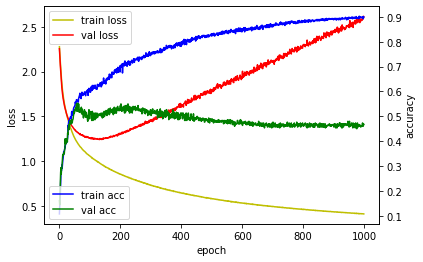

In [25]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label = 'train loss')
loss_ax.plot(hist.history['val_loss'],'r',label = 'val loss')

acc_ax.plot(hist.history['accuracy'],'b',label = 'train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()